In [1]:
import xgboost
import joblib
import numpy as np
from sklearn.metrics import accuracy_score
from quadratic_weighted_kappa import quadratic_weighted_kappa
import pandas as pd

In [2]:
#x = joblib.load('essay_ease10_sbert768_simbow_langerr_780')
x = joblib.load('files/asap7_features_776')
y = joblib.load("files/score_asap7")

In [3]:
x = x.reshape(-1,776)
x.shape

(1569, 776)

In [4]:
# TRY REMOVE PROMPT OVERLAP & PROMPT OVERLAP (SYNONYM) FEATURES, AS THEY HAVE NEGATIVE CORRELATION WITH FINAL SCORE

# x_776 = np.delete(x, [5,6],axis=1)
# x_776.shape

In [5]:
# x = x_776
# x.shape

In [6]:
def get_feature_names_extended():
    inter_feats = ['Answer Length', 'Word Count', 'Average Word Length', 'Unique Word Count', 'Punctuation Density',
                  'Prompt Overlap', 'Prompt Overlap (synonyms)', 'Prompt Similarity SBert', 
                  'Spelling Error', 'Language Error']
    inter_feats = ['Answer Length', 'Word Count', 'Average Word Length', 'Unique Word Count', 'Punctuation Density',
                  'Prompt Similarity SBert', 
                  'Spelling Error', 'Language Error']
    
    sbert_feats = []
    sbert_dim = 768

    for i in range(0, sbert_dim):
    	fname = "sbert_" + str(i) 
    	sbert_feats.append(fname)
    
    feature_names = inter_feats + sbert_feats 

    print("len feature names: ", len(feature_names))
    
    return feature_names

feature_names = get_feature_names_extended()#[:12]

len feature names:  776


In [7]:
#joblib.dump(feature_names, 'feature_names_778')

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(kf)

KFold(n_splits=5, random_state=42, shuffle=True)


In [9]:
model = xgboost.XGBRegressor(objective ='reg:squarederror',
                colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.05,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
# 0.8293

In [10]:
qwk_scores = []

test_indices = []
pred_labels = []

for train_index, test_index in kf.split(x, y):
    
    X_train, X_test, Y_train, Y_test = x[train_index], x[test_index], y[train_index], y[test_index]
         
    model.fit(X_train, Y_train)
    
    predict = model.predict(X_test)
    predict = np.round(predict)
    
    pred_labels.extend(predict)
    test_indices.extend(test_index)
    
    result = quadratic_weighted_kappa(Y_test, predict)
    
    print("Qwk : ", result)
    print(X_train.shape)
    qwk_scores.append(result)
    
np.mean(qwk_scores)

Qwk :  0.8058061434808113
(1255, 776)
Qwk :  0.7921508457909419
(1255, 776)
Qwk :  0.7984184562771091
(1255, 776)
Qwk :  0.7722700560089788
(1255, 776)
Qwk :  0.7379083512811128
(1256, 776)


0.7813107705677907

In [16]:
print(len(pred_labels))
print(len(test_indices))

1569
1569


In [17]:
new_score = np.zeros(1783)
new_score

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
new_score[test_indices] = pred_labels_int

NameError: name 'pred_labels_int' is not defined

In [14]:
new_score

array([9., 9., 8., ..., 7., 3., 7.])

In [15]:
new_score[60]

8.0

In [16]:
joblib.dump(new_score, 'score_model_normalized')

['score_model_normalized']

## Create model

In [9]:
from sklearn.model_selection import train_test_split
indices = np.arange(len(x))
X_train, X_test, Y_train, Y_test, idx_train, idx_test = train_test_split(x, y, indices, test_size=0.2, random_state=42)

In [10]:
len(idx_test)

314

In [11]:
d_train = xgboost.DMatrix(X_train, label=Y_train, feature_names=feature_names)
d_test = xgboost.DMatrix(X_test, label=Y_test, feature_names=feature_names)

In [12]:
model = xgboost.train({"learning_rate": 0.07, "max_depth":3}, d_train, 200, evals = [(d_test, "test")], early_stopping_rounds=20)

[0]	test-rmse:15.08095
[1]	test-rmse:14.06304
[2]	test-rmse:13.12504
[3]	test-rmse:12.25577
[4]	test-rmse:11.45174
[5]	test-rmse:10.70275
[6]	test-rmse:10.00334
[7]	test-rmse:9.35795
[8]	test-rmse:8.76565
[9]	test-rmse:8.21511
[10]	test-rmse:7.70061
[11]	test-rmse:7.23701
[12]	test-rmse:6.80171
[13]	test-rmse:6.40054
[14]	test-rmse:6.03761
[15]	test-rmse:5.70285
[16]	test-rmse:5.39107
[17]	test-rmse:5.10831
[18]	test-rmse:4.85083
[19]	test-rmse:4.61325
[20]	test-rmse:4.40223
[21]	test-rmse:4.20496
[22]	test-rmse:4.03642
[23]	test-rmse:3.87850
[24]	test-rmse:3.73799
[25]	test-rmse:3.60586
[26]	test-rmse:3.49128
[27]	test-rmse:3.38501
[28]	test-rmse:3.29130
[29]	test-rmse:3.21228
[30]	test-rmse:3.14026
[31]	test-rmse:3.07147
[32]	test-rmse:3.01024
[33]	test-rmse:2.95301
[34]	test-rmse:2.91048
[35]	test-rmse:2.86971
[36]	test-rmse:2.83260
[37]	test-rmse:2.79762
[38]	test-rmse:2.76519
[39]	test-rmse:2.74348
[40]	test-rmse:2.72392
[41]	test-rmse:2.70636
[42]	test-rmse:2.68755
[43]	test-rmse

In [13]:
yxgb_pred = model.predict(d_test)
yxgb_pred = np.round(yxgb_pred)

In [14]:
accuracy_score(yxgb_pred, Y_test)

0.14331210191082802

In [15]:
quadratic_weighted_kappa(yxgb_pred, Y_test)

0.811294539933647

In [16]:
joblib.dump(model, 'files/model_asap7_776')

['files/model_asap7_776']

## Model interpretation

In [17]:
imp_vals = model.get_fscore()
#print(imp_vals)
feature_important = model.get_score(importance_type='weight')
feats_sorted = sorted(feature_important.items(), key=lambda x: x[1], reverse=True)
aa_25 = feats_sorted[:25]

In [18]:
x_axis = [i[0] for i in aa_25]
y_axis = [i[1] for i in aa_25]

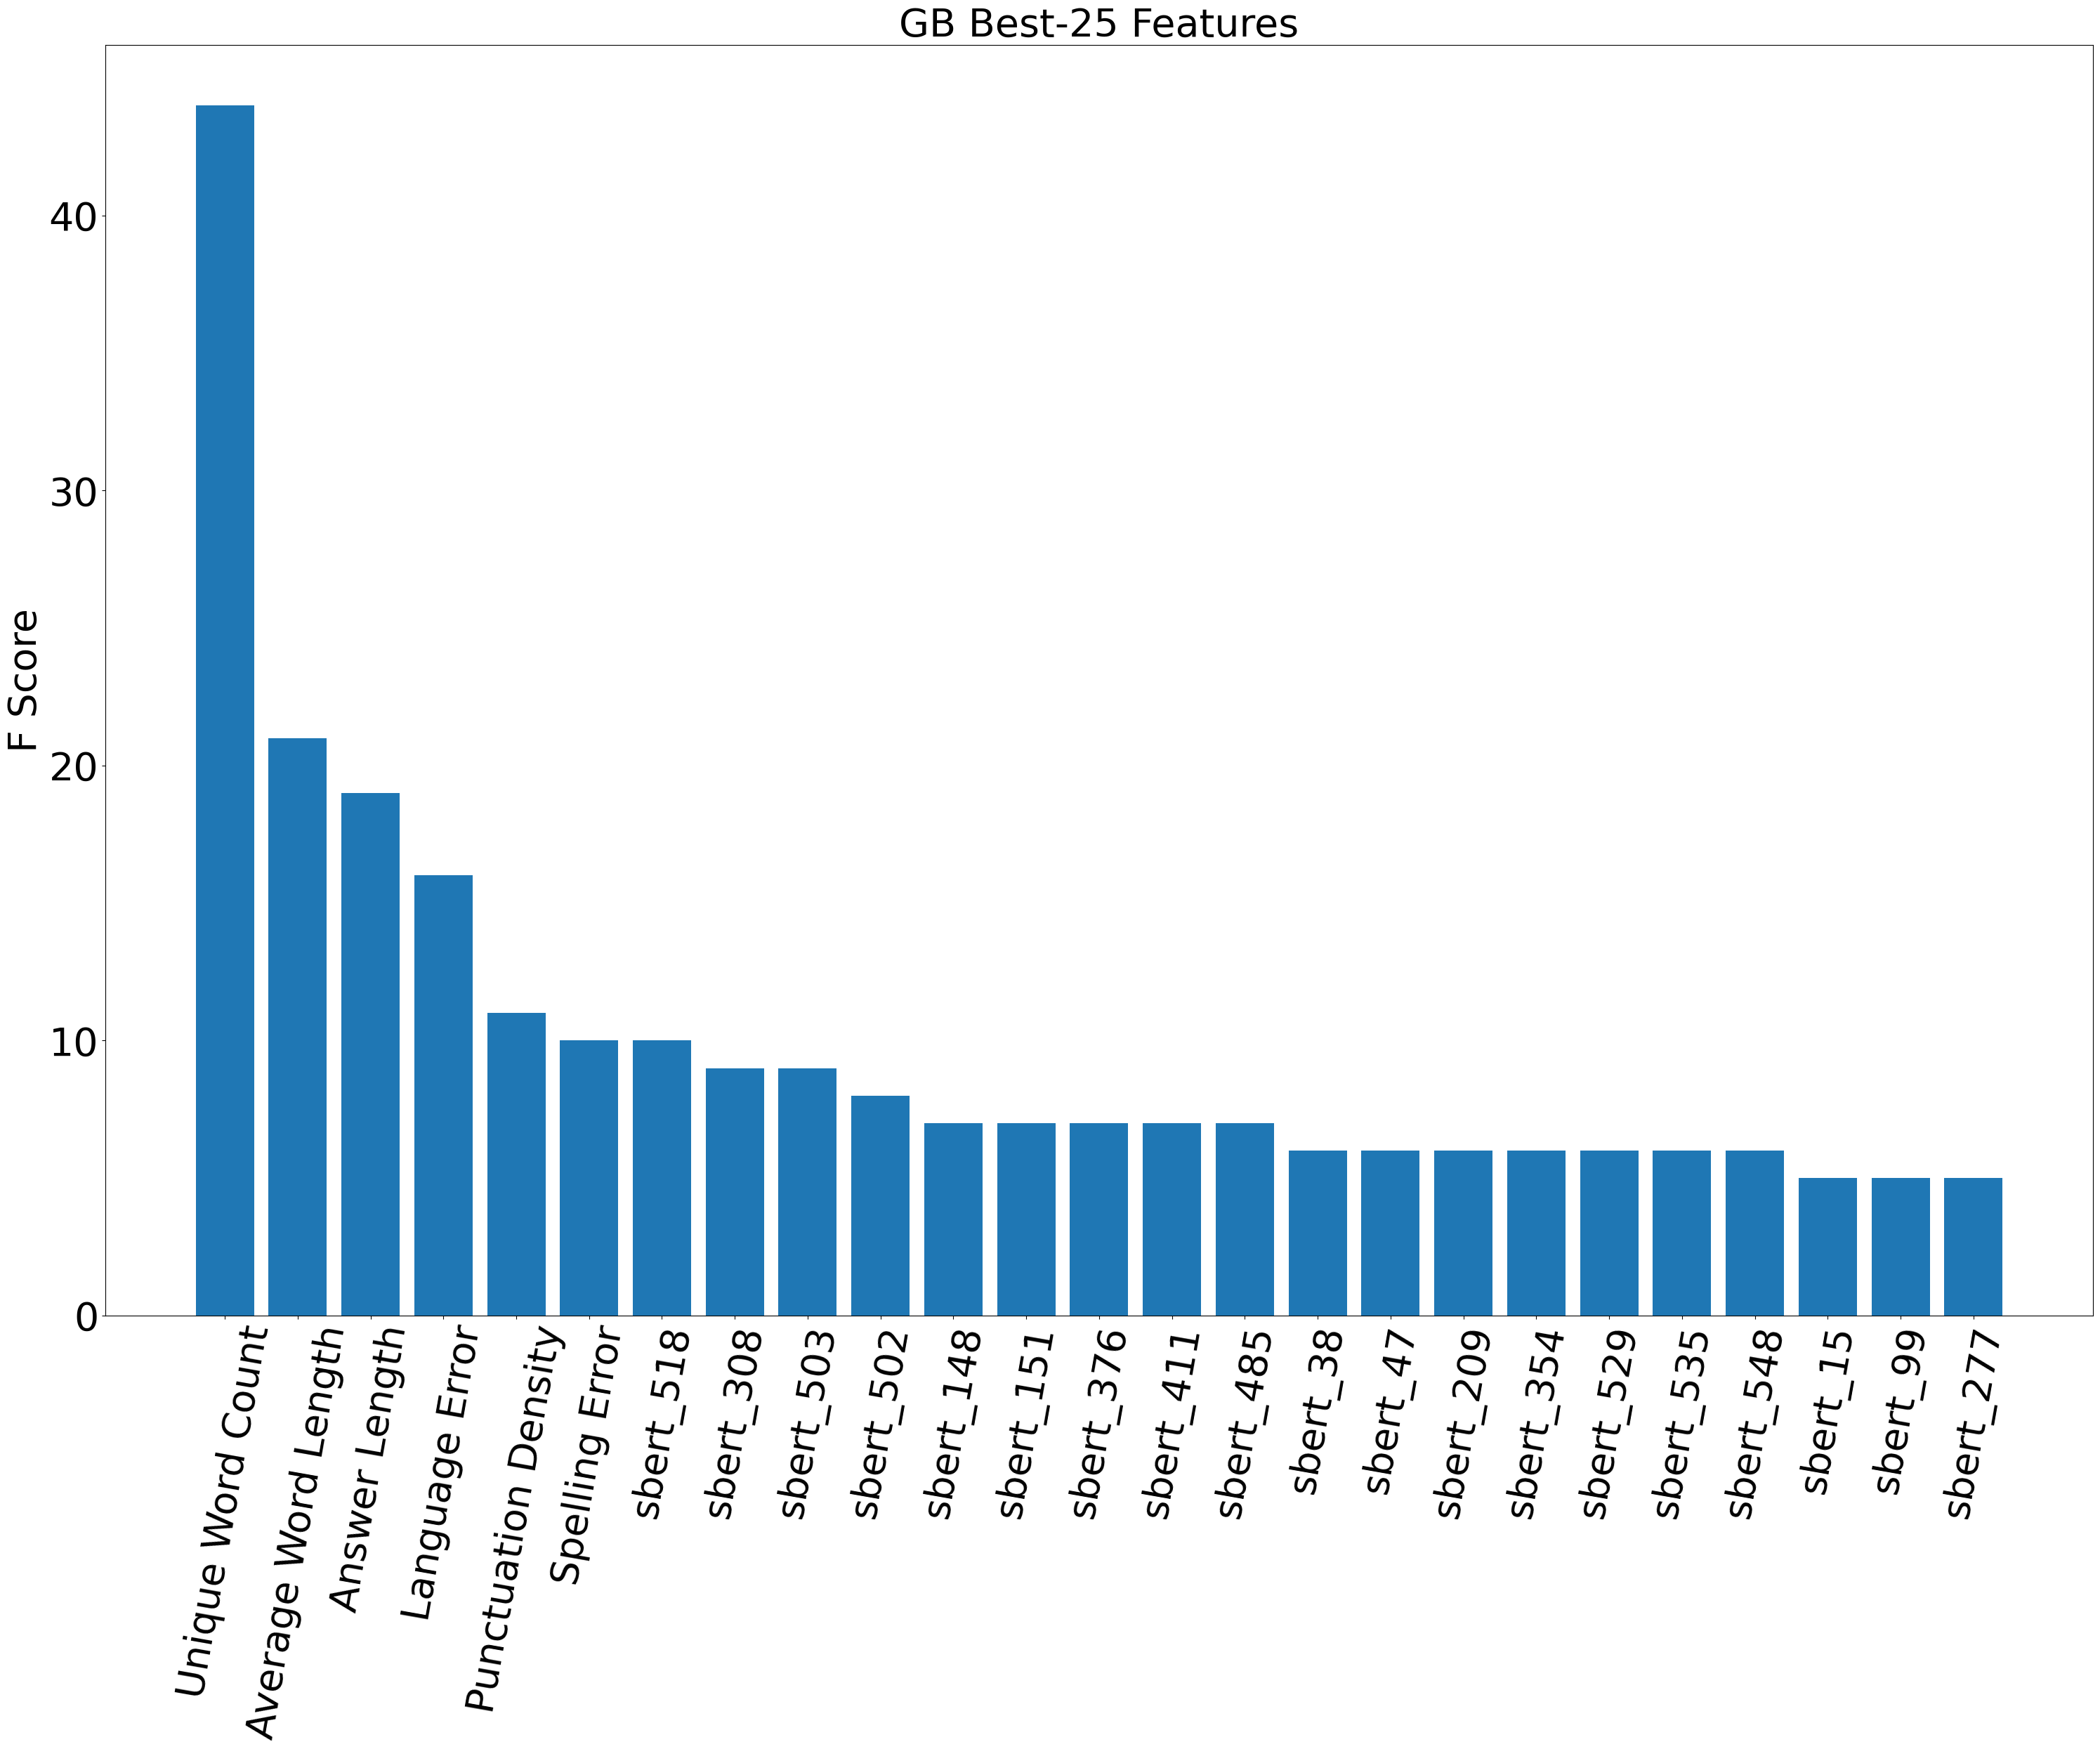

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,25))
plt.title("GB Best-25 Features", fontsize=40)
plt.bar(x_axis, y_axis, width=0.8, align='center')
plt.xticks(x_axis, fontsize=40, rotation=80)
plt.ylabel("F Score", fontsize=40)
plt.yticks(fontsize=40)
plt.tight_layout()
plt.savefig('gb_best_25.png')
plt.show()

### Get Testing Data

In [3]:
asap1 = joblib.load('asap1_essay')

NameError: name 'joblib' is not defined

In [2]:
asap1

NameError: name 'asap1' is not defined

In [63]:
len(asap1)

1783

In [64]:
type(asap1)

pandas.core.frame.DataFrame

In [65]:
asap1_test = asap1.iloc[idx_test]

In [66]:
len(asap1_test)

357

In [67]:
#asap1_test

In [68]:
asap1_test.to_csv('ASAP1 Test Set.tsv', index=False, sep='\t')

In [69]:
df = pd.read_csv('ASAP1 Test Set.tsv', sep='\t', encoding = "ISO-8859-1")

### Get Training Data

In [70]:
asap1_train = asap1.iloc[idx_train]

In [71]:
len(asap1_train)

1426

In [72]:
asap1_train.to_csv('ASAP1 Train Set.tsv', index=False, sep='\t')

In [73]:
df = pd.read_csv('ASAP1 Train Set.tsv', sep='\t', encoding = "ISO-8859-1")